<a href="https://colab.research.google.com/github/Shubhangi105/BenchmarkingFHEModels/blob/main/Encrypted_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training neural netwrok using QAT and measuring accuracy with FHE

Benchmarking accuracy in neural networks on Concrete ML for FHE. The code is profiled and time performance is reported on the outputs of the cells and the project report.

##Installation

In [ ]:
!pip install -U pip wheel setuptools
#!pip install -r requirements.txt
!pip install concrete-ml
!pip install brevitas
!pip install torchvision
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.6/671.6 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Concrete-Python
from concrete.fhe.compilation import Configuration

# The QAT model
from model import MNISTQATModel  # pylint: disable=no-name-in-module
from torch import nn, optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from tqdm import tqdm

# Concrete ML
from concrete.ml.torch.compile import compile_brevitas_qat_model

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


##Neural Network set-up

###Functions

The following functions are for training and testing of the model

In [ ]:
def train(model, device, train_loader, optimizer, epoch, criterion):
    """Train the model."""

    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data).squeeze()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if epoch % 4 == 0 and batch_idx % 500 == 0:
            print(
                f"Train Epoch: {epoch + 1} [{batch_idx}/{len(train_loader.dataset) // len(data)}"
                f" ({100.0 * batch_idx / len(train_loader):.0f}%)]{'':5}"
                f"\tLoss: {loss.item():.6f}"
            )

In [ ]:
def test(model, device, test_loader, epoch, criterion):
    """Test the model."""

    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in tqdm(test_loader, disable=epoch % 4 != 0):
            data, target = data.to(device), target.to(device)
            output = model(data).squeeze()
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    if epoch % 4 == 0:
        print(
            f"Test set: Average loss: {test_loss:.4f}, "
            "Accuracy: "
            f"{correct}/{len(test_loader.dataset)} "
            f"({100.0 * correct / len(test_loader.dataset):.0f}%)"
        )

    return test_loss

In [ ]:
def manage_dataset(train_kwargs, test_kwargs):
    """Get training and test parts of MNIST data-set."""

    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            transforms.Lambda(torch.flatten),
        ]
    )

    # Manage data-sets
    dataset1 = datasets.MNIST("./data", train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST("./data", train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    return train_loader, test_loader

The following function is used to test the model, it can be done either using FHE execution or with FHE simulation  (i.e., on clear data).

Evaluating models using FHE simulation is a very good habit to have when working with Concrete ML since it allows to check several aspects without having to wait for long FHE computations:
- the impact of the FHE execution on the accuracy
- the bit-widths of intermediate values, which impact FHE execution time

In [ ]:
import time

def compile_and_test(
    model,
    use_simulation,
    test_data,
    test_data_length,
    test_target,
    show_mlir,
    current_index,
):
    # Compile the QAT model and test
    configuration = Configuration(
        enable_unsafe_features=True,  # This is for our tests only, never use that in prod
        use_insecure_key_cache=True,  # This is for our tests only, never use that in prod
        insecure_key_cache_location="/tmp/keycache",
    )

    if use_simulation:
        print(f"\n{current_index}. Compiling with the FHE simulation")
    else:
        print(f"\n{current_index}. Compiling in FHE")

    q_module = compile_brevitas_qat_model(
        model,
        test_data,
        configuration=configuration,
        show_mlir=show_mlir,
    )

    # Check max bit-width
    max_bit_width = q_module.fhe_circuit.graph.maximum_integer_bit_width()
    #print(max_bit_width)

    if max_bit_width > 8:
        raise Exception(
            f"Too large bit-width ({max_bit_width}): training this network resulted in an "
            "accumulator size that is too large. Possible solutions are:"
            "    - this network should, on average, have 8bit accumulators. In your case an unlucky"
            f"initialization resulted in {max_bit_width} accumulators. You can try to train the "
            "network again"
            "    - reduce the sparsity to reduce the number of active neuron connections"
            "    - if the weight and activation bit-width is more than 2, you can try to reduce one"
            "or both to a lower value"
        )

    # Check the accuracy
    if use_simulation:
        print(
            f"\n{current_index + 1}. Checking accuracy with the FHE simulation mode "
            f"(length {test_data_length})"
        )
    else:
        print(f"\n{current_index + 1}. Checking accuracy in FHE (length {test_data_length})")

    # Key generation
    if not use_simulation:
        q_module.fhe_circuit.keygen()

    correct_fhe = 0

    # Reduce the test data, since very slow in FHE
    reduced_test_data = test_data[0:test_data_length, :]
    test_target = test_target[0:test_data_length, :]

    fhe_mode = "simulate" if use_simulation else "execute"
    t1 = time.perf_counter()
    prediction = q_module.forward(reduced_test_data, fhe=fhe_mode)
    t2 = time.perf_counter()
    print("Time taken: ",t2-t1)

    correct_fhe = (np.argmax(prediction, axis=1) == test_target.ravel()).sum()

    # Final accuracy
    return correct_fhe, reduced_test_data.shape[0], max_bit_width

### Settings

Setting the different parameters of the model and loading the dataset.

In [ ]:
# Options: the most important ones
epochs = 20
sparsity = 4
quantization_bits = 2
do_training = True
save_model = False

# Options: can be changed
lr = 0.02
gamma = 0.33
test_data_length_reduced = 2  # This is notably the length of the computation in FHE
test_data_length_full = 10000

# Options: no real reason to change
show_mlir = False
batch_size = 32
test_batch_size = 32
use_cuda_if_available = True
seed = None
criterion = nn.CrossEntropyLoss()

Seeding if we want to, to try to make everything as reproducible as possible.

In [ ]:
# Seeding
if seed is None:
    seed = np.random.randint(0, 2**32 - 1)

print(f"\nUsing seed {seed}\n")
torch.manual_seed(seed);


Using seed 2926655560



In [ ]:
seed = 2926655560
print(f"\nUsing seed {seed}\n")
torch.manual_seed(seed);


Using seed 2926655560



Settings few things for the training.

In [ ]:
# Training and test arguments
train_kwargs = {"batch_size": batch_size}
test_kwargs = {"batch_size": test_batch_size}

# Cuda management
use_cuda = torch.cuda.is_available() and use_cuda_if_available
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    cuda_kwargs = {"num_workers": 1, "pin_memory": True, "shuffle": True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

print(f"\nUsing {device} device\n")


Using cpu device



Managing the MNIST data set, and splitting it into a
train and testing set.

In [ ]:
# Manage data-set
train_loader, test_loader = manage_dataset(train_kwargs, test_kwargs)
img_size = train_loader.dataset.data[0].shape[0]

100%|██████████| 9912422/9912422 [00:00<00:00, 248371862.89it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19203502.51it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 69748990.43it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13925825.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## QAT model training

The model is defined in `model.py`.

In [ ]:
# Model definition
model = MNISTQATModel(quantization_bits, quantization_bits)
model = model.to(device)

Below, depending on the value of do_training, you can either run the quantization-aware training, which might be time-consuming, or load a pretrained model by setting `do_training = False`.

Performing MNIST task with 2-bits in quantization and a sparsity of 4.

1. Training
Train Epoch: 1 [0/1875 (0%)]     	Loss: 8.985333
Train Epoch: 1 [500/1875 (27%)]     	Loss: 1.019910
Train Epoch: 1 [1000/1875 (53%)]     	Loss: 0.630351
Train Epoch: 1 [1500/1875 (80%)]     	Loss: 0.353047


100%|██████████| 313/313 [00:14<00:00, 21.78it/s]


Test set: Average loss: 0.0206, Accuracy: 8051/10000 (81%)
Train Epoch: 5 [0/1875 (0%)]     	Loss: 0.149230
Train Epoch: 5 [500/1875 (27%)]     	Loss: 0.573497
Train Epoch: 5 [1000/1875 (53%)]     	Loss: 0.455737
Train Epoch: 5 [1500/1875 (80%)]     	Loss: 0.200558


100%|██████████| 313/313 [00:07<00:00, 43.14it/s]


Test set: Average loss: 0.0120, Accuracy: 8875/10000 (89%)
Train Epoch: 9 [0/1875 (0%)]     	Loss: 0.204037
Train Epoch: 9 [500/1875 (27%)]     	Loss: 0.529180
Train Epoch: 9 [1000/1875 (53%)]     	Loss: 0.338629
Train Epoch: 9 [1500/1875 (80%)]     	Loss: 0.123368


100%|██████████| 313/313 [00:07<00:00, 43.67it/s]


Test set: Average loss: 0.0097, Accuracy: 9069/10000 (91%)
Train Epoch: 13 [0/1875 (0%)]     	Loss: 0.232755
Train Epoch: 13 [500/1875 (27%)]     	Loss: 0.721928
Train Epoch: 13 [1000/1875 (53%)]     	Loss: 0.586523
Train Epoch: 13 [1500/1875 (80%)]     	Loss: 0.152091


100%|██████████| 313/313 [00:07<00:00, 43.70it/s]


Test set: Average loss: 0.0099, Accuracy: 9058/10000 (91%)
Train Epoch: 17 [0/1875 (0%)]     	Loss: 0.135512
Train Epoch: 17 [500/1875 (27%)]     	Loss: 0.592692
Train Epoch: 17 [1000/1875 (53%)]     	Loss: 0.535859
Train Epoch: 17 [1500/1875 (80%)]     	Loss: 0.188149


100%|██████████| 313/313 [00:10<00:00, 30.47it/s]


Test set: Average loss: 0.0099, Accuracy: 9058/10000 (91%)


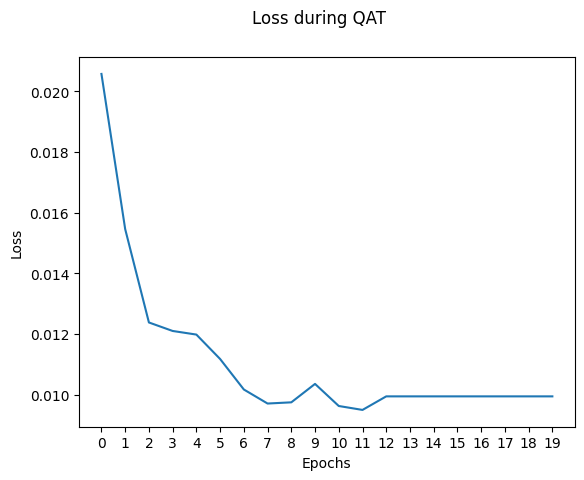

In [ ]:
# Training part
print(
    f"Performing MNIST task with {quantization_bits}-bits in quantization and a "
    f"sparsity of {sparsity}."
)

if do_training:

    model.prune(sparsity, True)

    print("\n1. Training")
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0001)
    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    loss_values = []

    for epoch in range(epochs):
        train(model, device, train_loader, optimizer, epoch, criterion)
        cur_loss = test(model, device, test_loader, epoch, criterion)

        scheduler.step()

        loss_values.append(cur_loss)

    model.prune(sparsity, False)

    # Plot the loss
    fig = plt.figure()
    plt.plot(loss_values)
    fig.suptitle("Loss during QAT")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.xticks(range(len(loss_values)))

    if save_model:
        # Export to ONNX
        print("\n2. Exporting to ONNX and saving the Brevitas model")
        inp = torch.rand((1, img_size * img_size)).to(device)
        torch.onnx.export(model, inp, "mnist.qat.onnx", opset_version=14)
        torch.save(model.state_dict(), "state_dict.pt")
else:
    print("\n1. Loading pre-trained model")
    # Ensure that "state_dict.pt" is pulled through GIT LFS
    checkpoint = torch.load("state_dict.pt", map_location=device)
    model.load_state_dict(checkpoint)

We prepare the ground truth, for final check of the model.

In [ ]:
# Prepare tests
test_data = np.zeros((len(test_loader.dataset), img_size * img_size))
test_target = np.zeros((len(test_loader.dataset), 1))
idx = 0

for data, target in tqdm(test_loader):
    target_np = target.cpu().numpy()
    for idx_batch, im in enumerate(data.numpy()):
        test_data[idx] = im
        test_target[idx] = target_np[idx_batch]
        idx += 1

100%|██████████| 313/313 [00:03<00:00, 84.07it/s]


## Measuring accuracy

### Measuring accuracy with FHE simulation and FHE execution

Finally, we measure:
- accuracy with FHE simulation for the full test set
- accuracy with FHE simulation for the reduced test set
- accuracy in FHE for the reduced test set   

and we check that accuracy with FHE simulation and in FHE are equivalent on the reduced test set.

Running FHE computations on a too large reduced test set may be prohibitive since we're 100% on CPU.

In [ ]:
# Test in the FHE simulation and in real FHE computation
accuracy = {}
current_index = 3

for use_simulation, use_full_dataset in [(True, True), (True, False), (False, False)]:
    test_data_length = test_data_length_full if use_full_dataset else test_data_length_reduced

    correct_fhe, test_data_shape_0, max_bit_width = compile_and_test(
        model.cpu(),
        use_simulation,
        test_data,
        test_data_length,
        test_target,
        show_mlir,
        current_index,
    )

    current_index += 2
    current_accuracy = correct_fhe / test_data_shape_0

    print(
        f"Accuracy in {'Simulation' if use_simulation else 'FHE'} with length {test_data_length}: "
        f"{correct_fhe}/{test_data_shape_0} = "
        f"{current_accuracy:.4f}, in {max_bit_width}-bits"
    )

    if (use_simulation, use_full_dataset) == (True, True):
        accuracy["FHE Simulation full"] = current_accuracy
    elif (use_simulation, use_full_dataset) == (True, False):
        accuracy["FHE simulation short"] = current_accuracy
    else:
        assert (use_simulation, use_full_dataset) == (False, False)
        accuracy["FHE short"] = current_accuracy


3. Compiling with the FHE simulation

4. Checking accuracy with the FHE simulation mode (length 10000)
Accuracy in Simulation with length 10000: 9058/10000 = 0.9058, in 6-bits

5. Compiling with the FHE simulation

6. Checking accuracy with the FHE simulation mode (length 2)
Accuracy in Simulation with length 2: 2/2 = 1.0000, in 6-bits

7. Compiling in FHE

8. Checking accuracy in FHE (length 2)
Accuracy in FHE with length 2: 2/2 = 1.0000, in 6-bits


Checking accuracy and time for FHE simulation and FHE execution for reduced datapoints

In [ ]:

# Test in the FHE simulation and in real FHE computation
accuracy = {}
current_index = 3

for use_simulation, use_full_dataset in [(True, False), (False, False)]:
    test_data_length = test_data_length_full if use_full_dataset else test_data_length_reduced

    correct_fhe, test_data_shape_0, max_bit_width = compile_and_test(
        model.cpu(),
        use_simulation,
        test_data,
        test_data_length,
        test_target,
        show_mlir,
        current_index,
    )

    current_index += 2
    current_accuracy = correct_fhe / test_data_shape_0

    print(
        f"Accuracy in {'Simulation' if use_simulation else 'FHE'} with length {test_data_length}: "
        f"{correct_fhe}/{test_data_shape_0} = "
        f"{current_accuracy:.4f}, in {max_bit_width}-bits"
    )

    if (use_simulation, use_full_dataset) == (True, False):
        accuracy["FHE simulation short"] = current_accuracy
    else:
        assert (use_simulation, use_full_dataset) == (False, False)
        accuracy["FHE short"] = current_accuracy


3. Compiling with the FHE simulation

4. Checking accuracy with the FHE simulation mode (length 2)
Time taken:  0.018122289000075398
Accuracy in Simulation with length 2: 2/2 = 1.0000, in 6-bits

5. Compiling in FHE

6. Checking accuracy in FHE (length 2)
Time taken:  182.96037620200013
Accuracy in FHE with length 2: 2/2 = 1.0000, in 6-bits


Checking accuracy and time for FHE-disable (without FHE) for reduced dataset

In [ ]:
def compile_and_test(
    model,
    use_simulation,
    test_data,
    test_data_length,
    test_target,
    show_mlir,
    current_index,
):
    # Compile the QAT model and test
    configuration = Configuration(
        enable_unsafe_features=True,  # This is for our tests only, never use that in prod
        use_insecure_key_cache=True,  # This is for our tests only, never use that in prod
        insecure_key_cache_location="/tmp/keycache",
    )

    if use_simulation:
        print(f"\n{current_index}. Compiling with the FHE simulation")
    else:
        print(f"\n{current_index}. Compiling in FHE")

    q_module = compile_brevitas_qat_model(
        model,
        test_data,
        configuration=configuration,
        show_mlir=show_mlir,
    )

    # Check max bit-width
    max_bit_width = q_module.fhe_circuit.graph.maximum_integer_bit_width()
    #print(max_bit_width)

    if max_bit_width > 8:
        raise Exception(
            f"Too large bit-width ({max_bit_width}): training this network resulted in an "
            "accumulator size that is too large. Possible solutions are:"
            "    - this network should, on average, have 8bit accumulators. In your case an unlucky"
            f"initialization resulted in {max_bit_width} accumulators. You can try to train the "
            "network again"
            "    - reduce the sparsity to reduce the number of active neuron connections"
            "    - if the weight and activation bit-width is more than 2, you can try to reduce one"
            "or both to a lower value"
        )

    # Check the accuracy
    if use_simulation:
        print(
            f"\n{current_index + 1}. Checking accuracy with the FHE simulation mode "
            f"(length {test_data_length})"
        )
    else:
        print(f"\n{current_index + 1}. Checking accuracy in FHE (length {test_data_length})")

    # Key generation
    if not use_simulation:
        q_module.fhe_circuit.keygen()

    correct_fhe = 0

    # Reduce the test data, since very slow in FHE
    reduced_test_data = test_data[0:test_data_length, :]
    test_target = test_target[0:test_data_length, :]

    fhe_mode = "disable" if use_simulation else "execute"
    t1 = time.perf_counter()
    prediction = q_module.forward(reduced_test_data, fhe=fhe_mode)
    t2 = time.perf_counter()
    print("Time taken: ",t2-t1)

    correct_fhe = (np.argmax(prediction, axis=1) == test_target.ravel()).sum()

    # Final accuracy
    return correct_fhe, reduced_test_data.shape[0], max_bit_width

In [ ]:
# Test in the FHE simulation and in real FHE computation
accuracy = {}
current_index = 3

for use_simulation, use_full_dataset in [(True, False)]:
    test_data_length = test_data_length_full if use_full_dataset else test_data_length_reduced

    correct_fhe, test_data_shape_0, max_bit_width = compile_and_test(
        model.cpu(),
        use_simulation,
        test_data,
        test_data_length,
        test_target,
        show_mlir,
        current_index,
    )

    current_index += 2
    current_accuracy = correct_fhe / test_data_shape_0

    print(
        f"Accuracy in {'Simulation' if use_simulation else 'FHE'} with length {test_data_length}: "
        f"{correct_fhe}/{test_data_shape_0} = "
        f"{current_accuracy:.4f}, in {max_bit_width}-bits"
    )

    if (use_simulation, use_full_dataset) == (True, False):
        accuracy["FHE simulation short"] = current_accuracy


3. Compiling with the FHE simulation

4. Checking accuracy with the FHE simulation mode (length 2)
Time taken:  0.05006195199985086
Accuracy in Simulation with length 2: 2/2 = 1.0000, in 6-bits
